In [2]:
import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [5]:
# 정규화 또는 표준화 --> 스케일링
# 이미지는 픽셀당 값의 범위가 0 ~ 255 그래서 모든 픽셀을 255로 나누면 0 ~1 사이를 가지는 스케일링
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

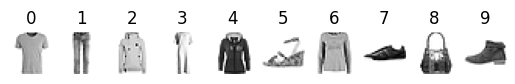

In [7]:
import matplotlib.pyplot as plt
for i,idx in enumerate([np.where(y_train == i)[0][0] for i in range(10)]):
  plt.subplot(1,10,i+1)
  plt.title(i)
  plt.imshow(x_train[idx],cmap='gray_r')
  plt.axis('off')
plt.show()

In [8]:
# 딥러닝 신경망 구현
# 컴파일
# 학습(fit)
# evaluate x_test 로 평가

In [9]:
x_train.shape[1:]

(28, 28)

In [32]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # 데이터 입력 층
    tf.keras.layers.Input(shape=x_train.shape[1:]), # tf.keras.layers.Input(shape=[28,28),
    # 1차원으로 차원을 변경
    tf.keras.layers.Flatten(),
    # 신경망
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [19]:
model.summary()  # 확인용도

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',  # 최적화 방법
              loss='sparse_categorical_crossentropy', # 손실함수
              metrics=['accuracy']) # 평가 방법

In [34]:
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_val,y_val),verbose=1)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7017 - loss: 0.8286 - val_accuracy: 0.8432 - val_loss: 0.4319
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8206 - loss: 0.5026 - val_accuracy: 0.8537 - val_loss: 0.3982
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8343 - loss: 0.4551 - val_accuracy: 0.8598 - val_loss: 0.3753
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8413 - loss: 0.4312 - val_accuracy: 0.8637 - val_loss: 0.3676
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8486 - loss: 0.4165 - val_accuracy: 0.8703 - val_loss: 0.3530
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8549 - loss: 0.3959 - val_accuracy: 0.8700 - val_loss: 0.3484
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8589 - loss: 0.3862 - val_accuracy: 0.8752 - val_loss: 0.3428
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3821 - 

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

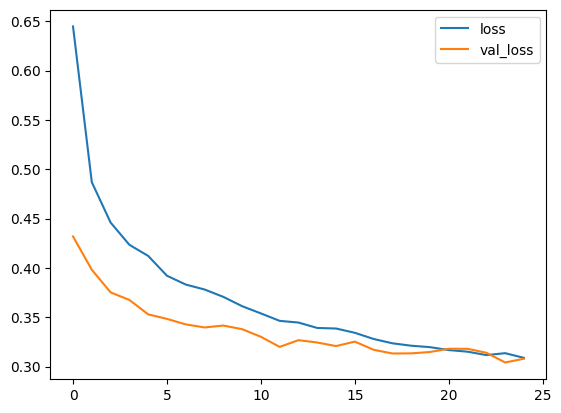

In [35]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

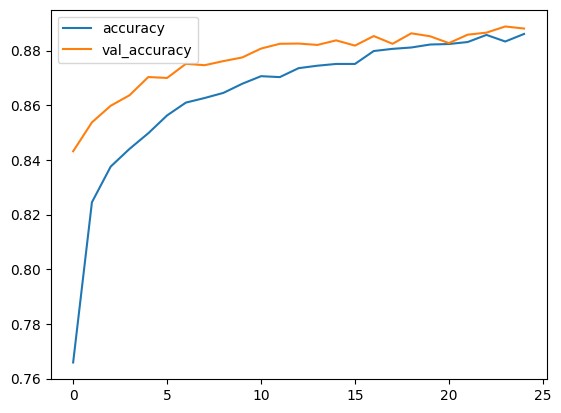

In [36]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [37]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.3339


[0.3327377438545227, 0.880299985408783]

In [39]:
# 예측
y_pred = model.predict(x_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5.0044274e-10, 6.3134060e-12, 6.1687560e-12, 1.7748538e-12,
       9.7314700e-12, 1.1081078e-02, 4.7801518e-10, 1.9674827e-03,
       7.3432167e-09, 9.8695135e-01], dtype=float32)

In [40]:
np.argmax(y_pred[0])

9

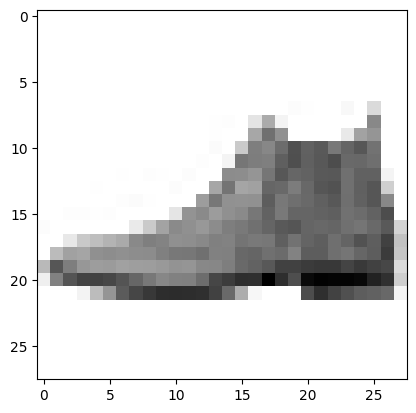

In [41]:
plt.imshow(x_test[0],cmap='gray_r')
plt.show()

In [42]:
normalization_layer = tf.keras.layers.Normalization()
h1 = tf.keras.layers.Dense(30,activation='relu')
h2 = tf.keras.layers.Dense(30,activation='relu')
concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(1)

# 조립
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 와이드 & 딥 신경망
housing = fetch_california_housing()
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target)
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full)
print(x_train.shape)

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = h1(normalized)
hidden2 = h2(hidden1)
concat_ = concat([normalized,hidden2])
output_ = output(concat_)

model = tf.keras.Model(inputs=[input_],outputs=[output_])
model.summary()


(11610, 8)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer_4[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 30)             │            930 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [45]:
# API 연결방식
# 와이드 & 딥 신경망 (일부 경로를 적용)
input_wide = tf.keras.layers.Input(shape=[5]) # 와이드의 입력
normal_wide = tf.keras.layers.Normalization()(input_wide)

input_deep = tf.keras.layers.Input(shape=[6]) # 딥 신경망의 입력시퀀스하게 연결
normal_deep = tf.keras.layers.Normalization()(input_deep)

hidden1 = tf.keras.layers.Dense(30,activation='relu')(normal_deep)
hidden2 = tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([normal_wide,hidden2])  # 와이드와 결합
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_6           │ (None, 6)              │             13 │ input_layer_10[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 30)             │            210 │ normalization_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_5           │ (None, 5)              │             11 │ input_layer_9[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 30)             │            930 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 35)             │              0 │ normalization_5[0][0], │
│ (Concatenate)             │                        │                │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 1)              │             36 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)